<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Andrés Arellano Ruelas y Jose Alberto Mayagoitia Gutierrez.

**Fecha:** 20 de octubre del 2021.

**Expediente** : 714383 y 720266.
    
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IvanArellanoRuelas/SPF_Tarea7_IArellano_JMayagoitia

# Tarea 7: Clase 13

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
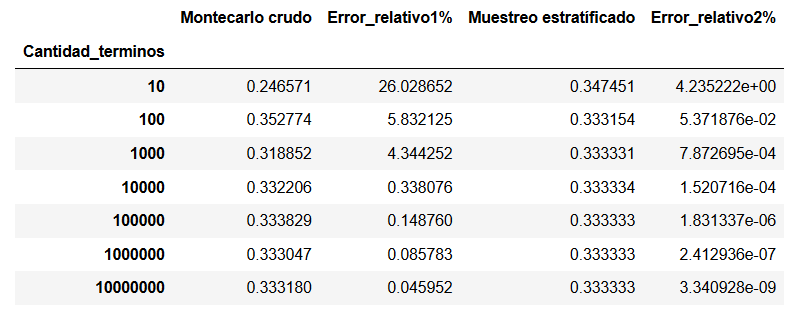


# Código Iván

In [1]:
# Código Iván 
import numpy as np
import pandas as pd

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior de la integral',
                   b:'Límite superior de la integral',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))
def estificado(N : 'Cantidad de estratos'):
    return (np.random.rand(N) + np.arange(0,N))/N

In [3]:
I = 1/3
# Intervalo de integración 
a = 0
b = 1

# Cant. de términos en escala logarítmica 
N = np.logspace(1,7,7,dtype=int)

# Números aleatorios dependiente de la cantidad de términos N
ui = list(map(lambda N:np.random.uniform(a,b,N),N))

# Función 
f = lambda x: x**2

# Calculamos la aproximación por montecarlo dependiendo de la cantidad de
# términos que hayamos creado con ui
I_m = list(map(lambda Y:int_montecarlo(f,a,b,Y),ui))

# Variables para el estratificado 
e = list(map(lambda n: estificado(n),N))

# Integración estratificado 
estra = list(map(lambda Y: int_montecarlo(f,a,b,Y),e))



In [4]:
# Definimos la tabla donde se mostrarán los resultados
df = pd.DataFrame(index=N,columns=['Montercarlo Crudo', 'Error_relativo1%','Muestreo_Estratificado','Error_Relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

# Llenado de información 
df['Montercarlo Crudo'] = I_m
df['Error_relativo1%'] = np.abs(df.loc[N,"Montercarlo Crudo"]-I)*100/I
df['Muestreo_Estratificado'] = estra
df['Error_Relativo2%'] = np.abs(df.loc[N,"Muestreo_Estratificado"]-I)*100/I
df

,Montercarlo Crudo,Error_relativo1%,Muestreo_Estratificado,Error_Relativo2%
Cantidad_terminos,,,,
10,0.346253,3.875950,0.339294,1.788214e+00
100,0.337276,1.182853,0.333350,5.056015e-03
1000,0.326062,2.181320,0.333331,7.126803e-04
10000,0.337962,1.388495,0.333334,8.792157e-05
100000,0.332731,0.180600,0.333333,2.954471e-06
1000000,0.333164,0.050754,0.333333,1.591252e-08
10000000,0.333363,0.009006,0.333333,2.964695e-09


# Código Jose

In [5]:
# Código Jose